In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
df = pd.read_csv('dados/data.csv', sep=',')
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [3]:
corr_matrix = df.corr(numeric_only=True)

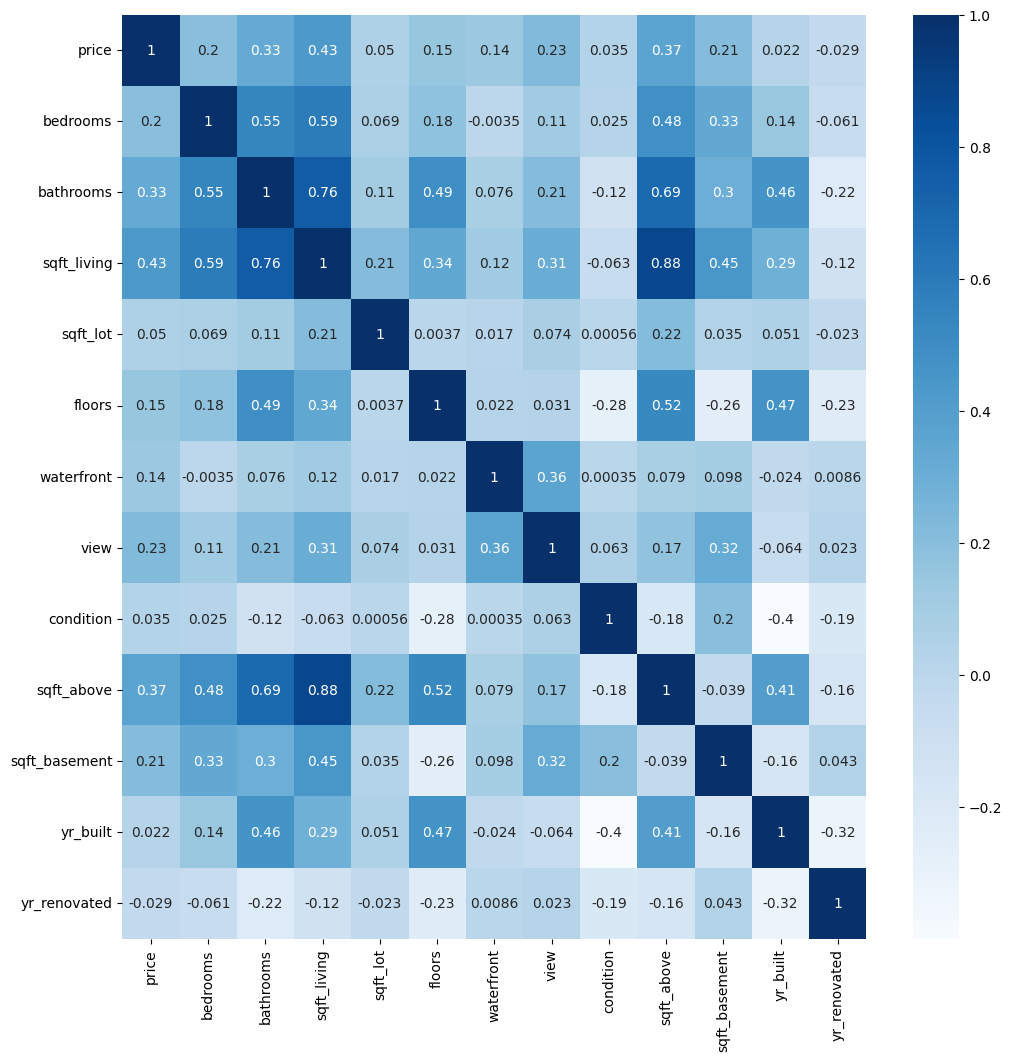

In [4]:
fig, ax = plt.subplots(figsize=(12,12))

sns.heatmap(corr_matrix, annot=True, cmap='Blues', ax=ax)

plt.show()

<Axes: >

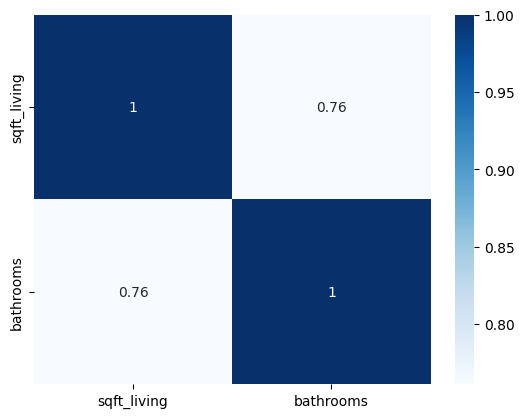

In [5]:
sns.heatmap(df[['sqft_living', 'bathrooms']].corr(), annot=True, cmap='Blues')

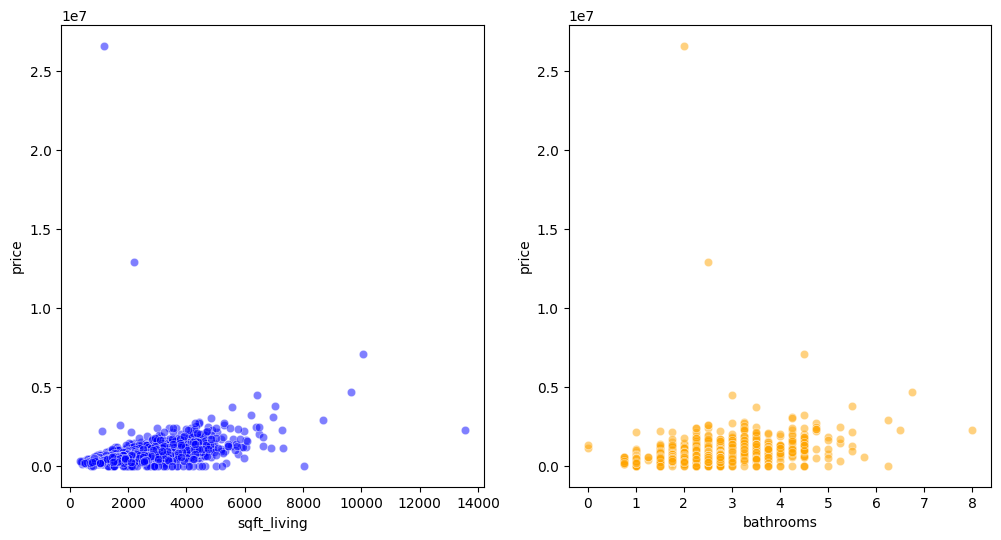

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

sns.scatterplot(data=df, x='sqft_living', y='price', ax=ax[0], color='blue',
                alpha=0.5)
sns.scatterplot(data=df, x='bathrooms', y='price', ax=ax[1], color='orange',
                alpha=0.5)

plt.show()

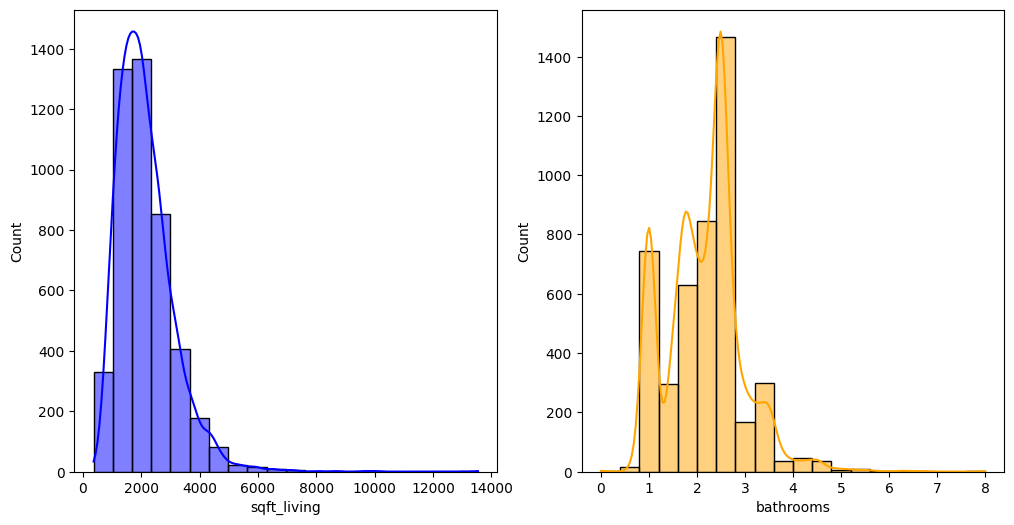

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

sns.histplot(data=df, x='sqft_living', ax=ax[0], color='blue', bins=20,
             kde=True)
sns.histplot(data=df, x='bathrooms', ax=ax[1], color='orange', bins=20,
             kde=True)

plt.show()

In [8]:
X = df[['sqft_living', 'bathrooms']].values
y = df['price'].values

In [9]:
std_scaler = StandardScaler()
X_std_scaled = std_scaler.fit_transform(X)

In [10]:
df_std_scaled = pd.DataFrame(X_std_scaled,
                             columns=['sqft_living', 'bathrooms'])

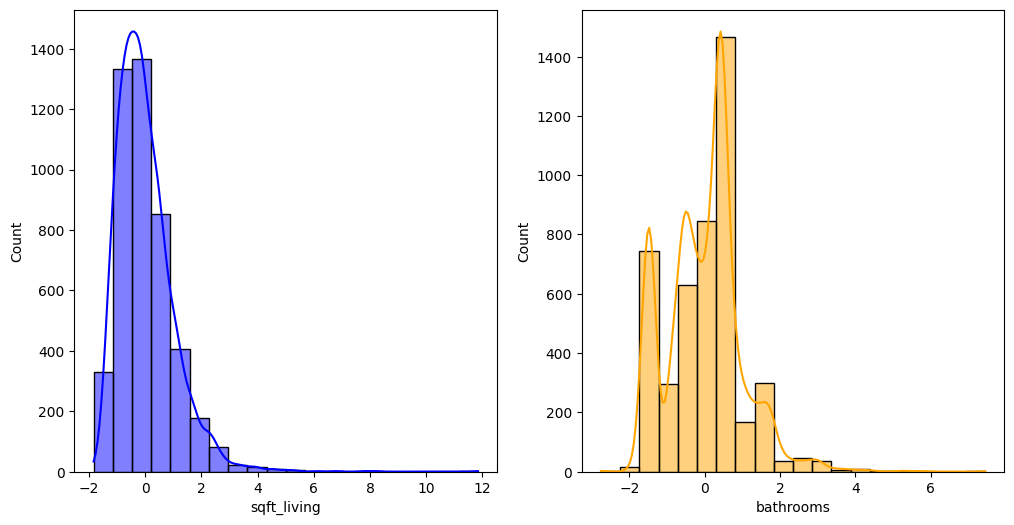

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

sns.histplot(data=df_std_scaled, x='sqft_living', ax=ax[0], color='blue',
             bins=20, kde=True)
sns.histplot(data=df_std_scaled, x='bathrooms', ax=ax[1], color='orange',
             bins=20, kde=True)

plt.show()

Understing Z-Scores and the StandardScaler

$ Z = \frac{(X - \mu)}{\sigma} $

Where:
- \( X \) is the data point
- \( $\mu$ \) is the mean of the data set
- \( $\sigma$ \) is the standard deviation of the data set

In [12]:
# Sample data
sample_data_1 = np.array([1, 2, 3, 4, 5])
sample_data_2 = np.array([1000, 2000, 3000, 4000, 5000])

# Mean
sample_data_1_mean = sample_data_1.mean()
sample_data_2_mean = sample_data_2.mean()

# Standard deviation
sample_data_1_std = sample_data_1.std()
sample_data_2_std = sample_data_2.std()

# Z-Score
z_sample_data_1 = (sample_data_1 - sample_data_1_mean) / sample_data_1_std
z_sample_data_2 = (sample_data_2 - sample_data_2_mean) / sample_data_2_std

print(sample_data_1, z_sample_data_1)
print()
print(sample_data_2, z_sample_data_2)
print()
print(std_scaler.fit_transform(np.expand_dims(sample_data_1, axis=1)))
print()
print(std_scaler.fit_transform(np.expand_dims(sample_data_2, axis=1)))

[1 2 3 4 5] [-1.41421356 -0.70710678  0.          0.70710678  1.41421356]

[1000 2000 3000 4000 5000] [-1.41421356 -0.70710678  0.          0.70710678  1.41421356]

[[-1.41421356]
 [-0.70710678]
 [ 0.        ]
 [ 0.70710678]
 [ 1.41421356]]

[[-1.41421356]
 [-0.70710678]
 [ 0.        ]
 [ 0.70710678]
 [ 1.41421356]]


In [13]:
# Data from the first five observations
sqft_living = np.array([1340, 3650, 1930, 2000, 1940])
bathrooms = np.array([1.5, 2.5, 2, 2.25, 2.5])

# Mean
mean_sqft_living = sqft_living.mean()
mean_bathrooms = bathrooms.mean()

# Standard deviation
std_sqft_living = sqft_living.std()
std_bathrooms = bathrooms.std()

# Z-Score
z_sqft_living = (sqft_living - mean_sqft_living) / std_sqft_living
z_bathrooms = (bathrooms - mean_bathrooms) / std_bathrooms

print(sqft_living, z_sqft_living)
print()
print(bathrooms, z_bathrooms)

[1340 3650 1930 2000 1940] [-1.07077886  1.90217687 -0.31145251 -0.22136294 -0.29858257]

[1.5  2.5  2.   2.25 2.5 ] [-1.73719807  0.93541435 -0.40089186  0.26726124  0.93541435]


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7)

In [15]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [16]:
y_pred = lin_reg.predict(X_test)

In [17]:
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('mae: ', mae)
print('r2: ', r2)

mae:  173536.74188212887
r2:  0.460589559677016
